In [1]:
%pip install html5lib
%pip install webdriver-manager
%pip install selenium
%pip install openpyxl
%pip install scikit-learn

from functools import partial
from io import StringIO
from matplotlib import style
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.common import NoSuchElementException,StaleElementReferenceException
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from time import sleep
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 1. First, crawl housing price data

# 1.1 Initialize browser
driver = webdriver.Chrome()
url='https://esf.fang.com/house-a015277-b02655/'
driver.get(url)

# 1.2 Test pagination functionality
try:
    next_page=driver.find_element(By.XPATH, '//a[text()="下一页"]')
    next_page.click()
except NoSuchElementException:
    print("NoSuchElementException")
    
try:
    last_page=driver.find_element(By.XPATH, '//a[text()="上一页"]')
    last_page.click()
except NoSuchElementException:
    print("NoSuchElementException")

# 1.3 Initialize data storage
all_data_1 = []
num_pages_1 = 6
global_counter_1 = 1

# 1.4 Main crawling loop
for page in range(num_pages_1):
    print(f"正在爬取第 {page + 1} 页...")
    house_list_container = driver.find_element(By.CLASS_NAME, 'shop_list')
    house_items = house_list_container.find_elements(By.XPATH, './dl[@class="clearfix"]')
    # Crawl current page content
    for house in house_items:
        try:
            # First column is ID
            house_data = {}
            house_data['编号'] = global_counter_1
            global_counter_1 += 1
            # Start extracting main content
            full_text = house.text
            # Second column is house area
            area_match = re.search(r'(\d+\.?\d*)\s*㎡', full_text)
            house_data['面积(㎡)'] = area_match.group(1) if area_match else ""
            # Third column is total house price
            total_price_match = re.search(r'(\d+)\s*万', full_text)
            house_data['总价(万)'] = total_price_match.group(1) if total_price_match else ""
            # Fourth column is price per square meter
            unit_price_match = re.search(r'(\d+)\s*元/㎡', full_text)
            house_data['单价(元/㎡)'] = unit_price_match.group(1) if unit_price_match else ""
            # Fifth column is distance to subway
            subway_match = re.search(r'距[^，]*?约?(\d+)米', full_text)
            house_data['地铁距离(米)'] = subway_match.group(1) if subway_match else ""
            # Sixth column is construction year
            year_match = re.search(r'(\d{4})年建', full_text)
            house_data['建成年份'] = year_match.group(1) if year_match else ""
               
            all_data_1.append(house_data)
            
        except Exception as e:
            print(f"提取第{global_counter_1}个房源时出错: {e}")
            continue
    
    # Pagination logic
    if page < num_pages_1 - 1:
        try:
            next_page = driver.find_element(By.XPATH, '//a[text()="下一页"]')
            next_page.click()
        except NoSuchElementException:
            print("没有找到下一页按钮，爬取结束")
            break
            
# 1.5 Return to homepage
try:
    first_page = driver.find_element(By.XPATH, '//div[@class="page_al"]/span[1]/a')
    first_page.click()
except NoSuchElementException:
    print("已经在第一页或第一页不可点击")

# 1.6 Save data to CSV
if all_data_1:
    df1 = pd.DataFrame(all_data_1)
    df1.to_csv('房产数据.csv', index=False, encoding='utf-8-sig')
    print("数据已保存到 房产数据.csv")

# 1.7 Close browser
driver.quit()

# 1.8 Display dataset
df1

正在爬取第 1 页...
正在爬取第 2 页...
正在爬取第 3 页...
正在爬取第 4 页...
正在爬取第 5 页...
正在爬取第 6 页...
数据已保存到 房产数据.csv


,编号,面积(㎡),总价(万),单价(元/㎡),地铁距离(米),建成年份
0,1,91.28,720,78878,867,
1,2,57,355,62280,867,
2,3,58.7,480,81771,502,
3,4,56.7,398,70194,502,
4,5,254,1255,49409,479,
...,...,...,...,...,...,...
306,307,196.7,1250,63549,479,
307,308,53.04,358,67497,479,
308,309,49.6,407,82057,502,
309,310,66.77,426,63802,502,


In [4]:
# 2. Then crawl rental data

# 2.1 Initialize browser
driver = webdriver.Chrome()
url='https://zu.fang.com/house-a015277-b02655/'
driver.get(url)

# 2.2 Test pagination functionality
try:
    next_page=driver.find_element(By.XPATH, '//a[text()="下一页"]')
    next_page.click()
except NoSuchElementException:
    print("NoSuchElementException")
    
try:
    last_page=driver.find_element(By.XPATH, '//a[text()="上一页"]')
    last_page.click()
except NoSuchElementException:
    print("NoSuchElementException")

# 2.3 Initialize data storage
all_data_2 = []
num_pages_2 = 6
global_counter_2 = 1

# 2.4 Main crawling loop
for page in range(num_pages_2):
    print(f"正在爬取第 {page + 1} 页...")
    house_list_container = driver.find_element(By.CLASS_NAME, 'houseList')
    house_items = house_list_container.find_elements(By.XPATH, './/dl[@class="list hiddenMap rel"]')
    # Crawl current page content
    for house in house_items:
        try:
            # First column is ID
            house_data = {}
            house_data['编号'] = global_counter_2
            global_counter_2 += 1
            # Start extracting main content
            full_text = house.text
            # Second column is monthly rent
            rent_match = re.search(r'(\d+)\s*元/月', full_text)
            house_data['月租金(元)'] = rent_match.group(1) if rent_match else ""
            # Third column is area
            area_match = re.search(r'(\d+\.?\d*)\s*㎡', full_text)
            house_data['面积(㎡)'] = area_match.group(1) if area_match else ""
            # Fourth column is distance to subway
            subway_match = re.search(r'距[^，]*?约?(\d+)米', full_text)
            house_data['地铁距离(米)'] = subway_match.group(1) if subway_match else ""
               
            all_data_2.append(house_data)
            
        except Exception as e:
            print(f"Error extracting rental #{global_counter_2}: {e}")
            continue

    # Pagination logic
    if page < num_pages_2 - 1:
        try:
            next_page = driver.find_element(By.XPATH, '//a[text()="下一页"]')
            next_page.click()
        except NoSuchElementException:
            print("没有找到下一页按钮，爬取结束")
            break

# 2.5 Save data to CSV
if all_data_2:
    df2 = pd.DataFrame(all_data_2)
    df2.to_csv('租房数据.csv', index=False, encoding='utf-8-sig')
    print("数据已保存到 租房数据.csv")

# 2.6 Close browser
driver.quit()

# 2.7 Display dataset
df2

正在爬取第 1 页...
正在爬取第 2 页...
正在爬取第 3 页...
正在爬取第 4 页...
正在爬取第 5 页...
没有找到下一页按钮，爬取结束
数据已保存到 租房数据.csv


,编号,月租金(元),面积(㎡),地铁距离(米)
0,1,15000,74,749
1,2,12500,85,479
2,3,7300,63,867
3,4,4260,18,502
4,5,9500,58,749
...,...,...,...,...
283,284,9000,57,502
284,285,7300,49,502
285,286,8000,65,867
286,287,6000,83,867


In [5]:
# 3.Data Description
price_df = pd.read_excel("D:/desktop/1.xlsx")
rent_df = pd.read_excel("D:/desktop/2.xlsx")

# 3.1 Remove invalid data (including null and repeated data)
price_clean = price_df.dropna()
rent_clean = rent_df.dropna()

price_clean = price_clean.drop_duplicates()
rent_clean = rent_clean.drop_duplicates()

print(f"\n房价数据: 原始{len(price_df)}条, 清洗后{len(price_clean)}条")
print(f"租金数据: 原始{len(rent_df)}条, 清洗后{len(rent_clean)}条\n")


# 3.2 Describe the data by group and identify the outliers
location_mapping = {
    1: '苏州桥',
    2: '万柳', 
    3: '北太平庄',
    4: '世纪城'
}

print("各区块房价数据描述性统计:")
for group in sorted(price_clean['group'].unique()):
    group_data = price_clean[price_clean['group'] == group]
    location_name = location_mapping[group]
    print(f"{location_name} (区块 {group}):")
    print(group_data[['m2', 'total_price']].describe())

print("\n各区块租金数据描述性统计:")
for group in sorted(rent_clean['group'].unique()):
    group_data = rent_clean[rent_clean['group'] == group]
    location_name = location_mapping[group]
    print(f"{location_name} (区块 {group}):")
    print(group_data[['m2', 'rent_price']].describe())


房价数据: 原始2898条, 清洗后854条
租金数据: 原始2997条, 清洗后626条

各区块房价数据描述性统计:
苏州桥 (区块 1):
               m2   total_price
count  169.000000  1.690000e+02
mean    88.281538  6.646331e+06
std     60.300798  3.897075e+06
min     26.800000  2.550000e+06
25%     56.700000  4.300000e+06
50%     66.910000  5.280000e+06
75%     91.280000  7.500000e+06
max    337.400000  2.690000e+07
万柳 (区块 2):
               m2   total_price
count  281.000000  2.810000e+02
mean   186.679431  3.162324e+07
std    103.081810  2.612303e+07
min     44.170000  3.790000e+06
25%    124.000000  1.525000e+07
50%    156.000000  2.290000e+07
75%    237.950000  3.980000e+07
max    745.000000  1.940000e+08
北太平庄 (区块 3):
               m2   total_price
count  117.000000  1.170000e+02
mean   132.097009  1.142299e+07
std     88.001812  7.494976e+06
min     26.500000  1.750000e+06
25%     78.400000  5.900000e+06
50%     95.150000  8.500000e+06
75%    150.550000  1.558000e+07
max    491.050000  2.950000e+07
世纪城 (区块 4):
               m2   total_

苏州桥:
  中位数房价每平方米: 78092.00
  中位数租金每平方米: 128.79
  房价租金比: 606.36
万柳:
  中位数房价每平方米: 144043.00
  中位数租金每平方米: 163.64
  房价租金比: 880.26
北太平庄:
  中位数房价每平方米: 90498.00
  中位数租金每平方米: 130.00
  房价租金比: 696.14
世纪城:
  中位数房价每平方米: 109727.00
  中位数租金每平方米: 107.48
  房价租金比: 1020.94


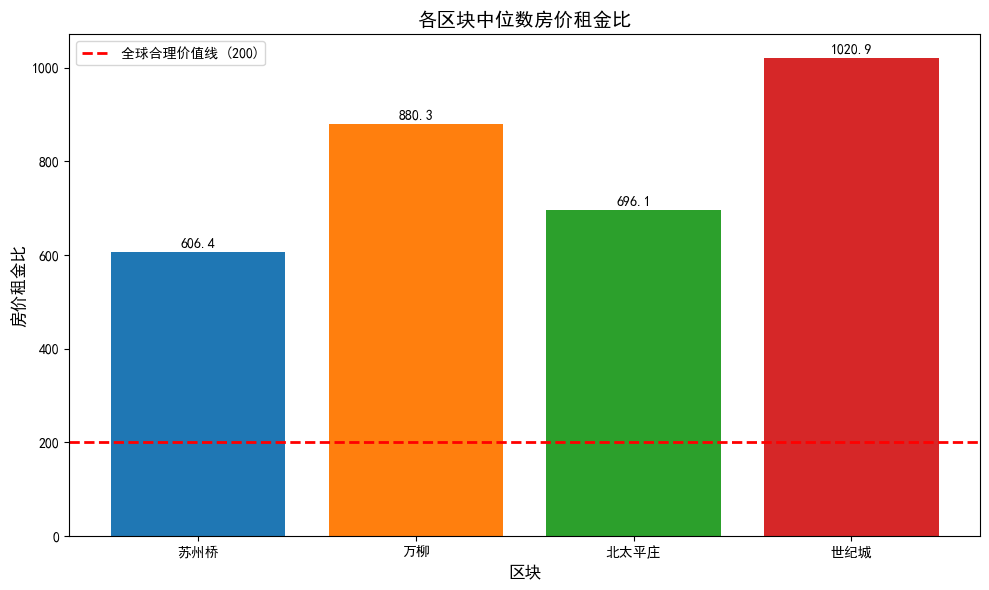

In [6]:
# 4. Calculate median price to rent ratio for each block and create bar plot
median_price_per_m2 = {}
median_rent_per_m2 = {}
price_rent_ratio = {}

# 4.1 Calculate median price to rent ratio
for group in sorted(price_clean['group'].unique()):
    group_data_price = price_clean[price_clean['group'] == group]
    group_data_rent = rent_clean[rent_clean['group'] == group]
    location_name = location_mapping[group]
    
    # Calculate median price per m2
    median_price = group_data_price['price_per_m2'].median()
    
    # Calculate median rent per m2
    median_rent = (group_data_rent['rent_price'] / group_data_rent['m2']).median()
    
    # Calculate price to rent ratio
    ratio = median_price / median_rent
    
    median_price_per_m2[location_name] = median_price
    median_rent_per_m2[location_name] = median_rent
    price_rent_ratio[location_name] = ratio
    
    print(f"{location_name}:")
    print(f"  中位数房价每平方米: {median_price:.2f}")
    print(f"  中位数租金每平方米: {median_rent:.2f}")
    print(f"  房价租金比: {ratio:.2f}")


# 4.2 Create bar plot for median price to rent ratio (Figure A)
plt.figure(figsize=(10, 6))
locations = list(price_rent_ratio.keys())
ratios = list(price_rent_ratio.values())

bars = plt.bar(locations, ratios, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球合理价值线 (200)')
plt.title('各区块中位数房价租金比', fontsize=14, fontweight='bold')
plt.xlabel('区块', fontsize=12)
plt.ylabel('房价租金比', fontsize=12)
plt.legend()

# Add value labels on bars
for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

苏州桥:
  预测房价中位数: 74554.19 元/㎡
  预测租金中位数: 137.31 元/㎡
  预测房价租金比: 542.95
万柳:
  预测房价中位数: 148434.45 元/㎡
  预测租金中位数: 186.44 元/㎡
  预测房价租金比: 796.14
北太平庄:
  预测房价中位数: 80589.95 元/㎡
  预测租金中位数: 138.10 元/㎡
  预测房价租金比: 583.57
世纪城:
  预测房价中位数: 112843.31 元/㎡
  预测租金中位数: 117.96 元/㎡
  预测房价租金比: 956.61


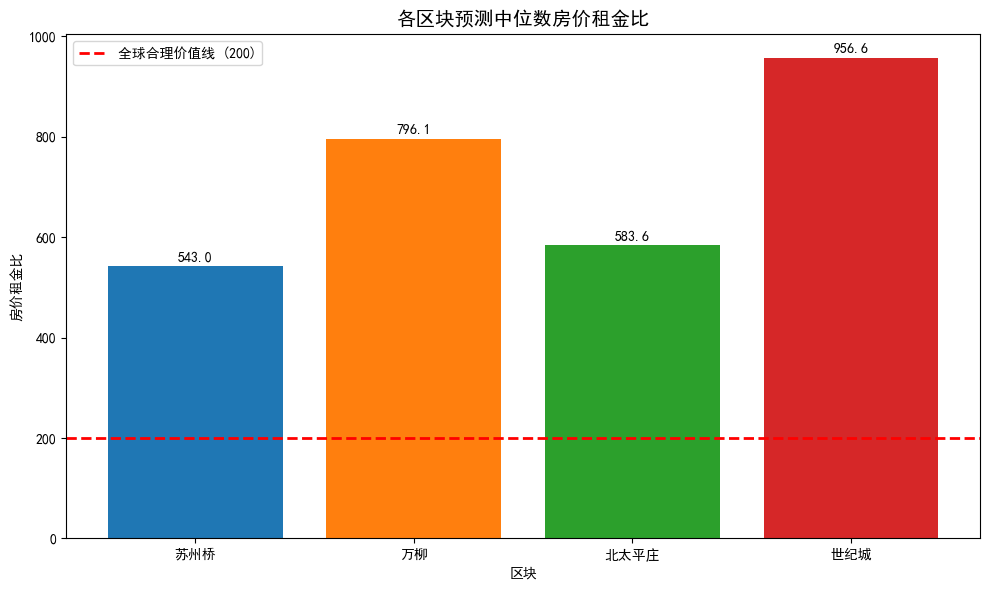

In [14]:
# 5. Build regression models and calculate predicted price to rent ratio

# 5.1 Build regression models

# Prepare house price data
X_price = price_clean[['m2', 'group']].copy()
X_price = pd.get_dummies(X_price, columns=['group'], prefix='group')
y_price = price_clean['total_price'] / price_clean['m2']

# Prepare rent data 
X_rent = rent_clean[['m2', 'group']].copy()
X_rent = pd.get_dummies(X_rent, columns=['group'], prefix='group')
y_rent = rent_clean['rent_price'] / rent_clean['m2']

# Train the house price model
price_model = LinearRegression()
price_model.fit(X_price, y_price)

# Train the rent model
rent_model = LinearRegression() 
rent_model.fit(X_rent, y_rent)

# 5.2 Calculate median predicted price and rent for each block
price_clean['predicted_price_m2'] = price_model.predict(X_price)
rent_clean['predicted_rent_m2'] = rent_model.predict(X_rent)
predicted_ratios = {}

for group in sorted(price_clean['group'].unique()):
    # Calculate median predicted price per m2 for this group
    median_predicted_price = price_clean[price_clean['group'] == group]['predicted_price_m2'].median()
    # Calculate median predicted rent per m2 for this group
    median_predicted_rent = rent_clean[rent_clean['group'] == group]['predicted_rent_m2'].median()
    # Calculate price to rent ratio
    ratio = median_predicted_price / median_predicted_rent
    
    location_name = location_mapping[group]
    predicted_ratios[location_name] = ratio
    print(f"{location_name}:")
    print(f"  预测房价中位数: {median_predicted_price:.2f} 元/㎡")
    print(f"  预测租金中位数: {median_predicted_rent:.2f} 元/㎡")
    print(f"  预测房价租金比: {ratio:.2f}")

# 5.3 Create bar plot for median price to rent ratio (Figure B)
plt.figure(figsize=(10, 6))
locations = list(predicted_ratios.keys())
ratios = list(predicted_ratios.values())

bars = plt.bar(locations, ratios, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球合理价值线 (200)')
plt.title('各区块预测中位数房价租金比', fontsize=14, fontweight='bold')
plt.xlabel('区块')
plt.ylabel('房价租金比')
plt.legend()

# Add value labels on bars
for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

增强模型特征数量: 16
特征包括: 一次项(m2, distance, group), 非线性项(m2²), 交互项(m2×group, group×distance, m2×distance)

模型R²比较:
房价模型 - 原始: 0.5764, 增强: 0.6796
租金模型 - 原始: 0.1953, 增强: 0.4193
苏州桥:
  增强模型预测房价中位数: 78592.74 元/㎡
  增强模型预测租金中位数: 141.55 元/㎡
  增强模型预测房价租金比: 555.21
万柳:
  增强模型预测房价中位数: 142453.17 元/㎡
  增强模型预测租金中位数: 167.64 元/㎡
  增强模型预测房价租金比: 849.77
北太平庄:
  增强模型预测房价中位数: 88291.78 元/㎡
  增强模型预测租金中位数: 140.17 元/㎡
  增强模型预测房价租金比: 629.91
世纪城:
  增强模型预测房价中位数: 111275.45 元/㎡
  增强模型预测租金中位数: 116.83 元/㎡
  增强模型预测房价租金比: 952.49


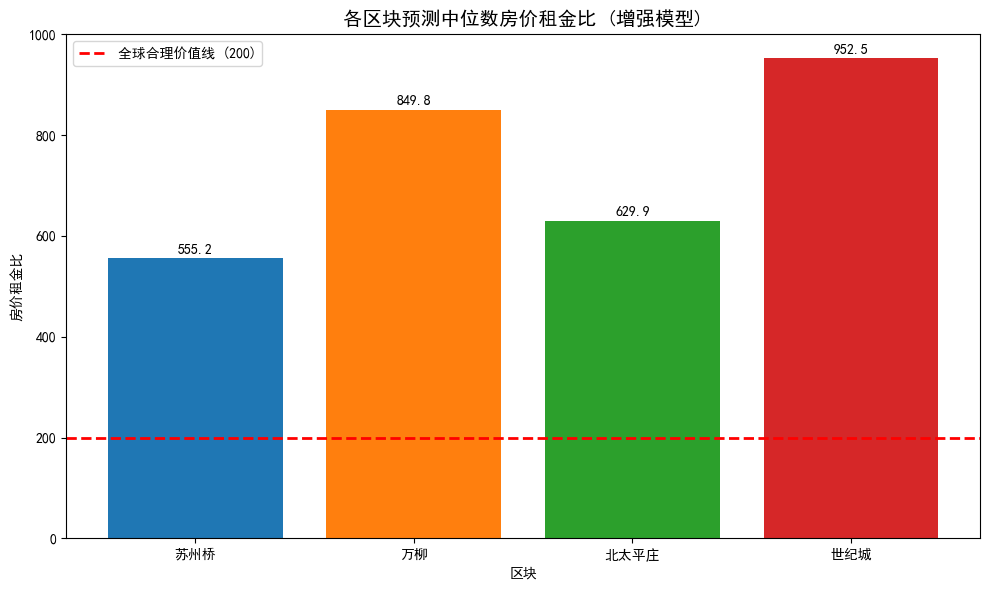


三种方法房价租金比比较:
     区块        原始数据法       简单模型法       增强模型法
0   苏州桥   606.361412  542.952024  555.214181
1    万柳   880.262778  796.139109  849.766939
2  北太平庄   696.138462  583.573765  629.907176
3   世纪城  1020.938174  956.610541  952.490053


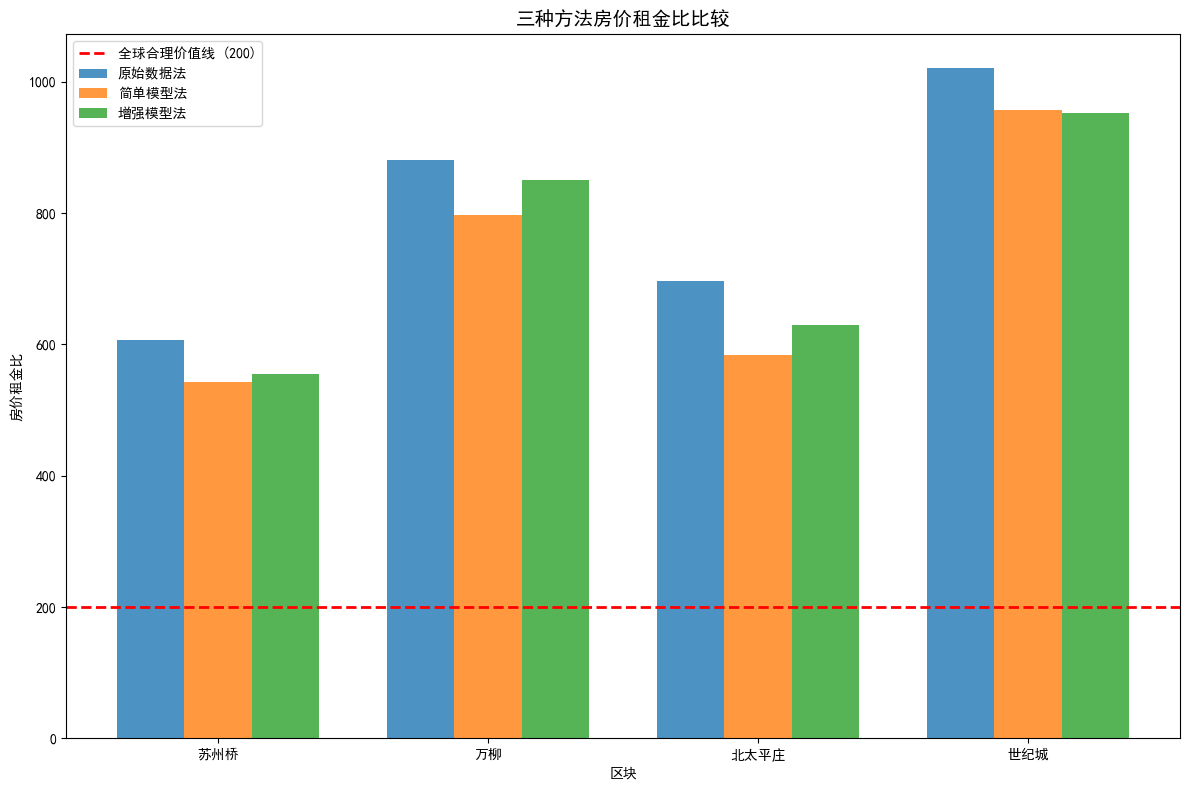

In [16]:
# 6.Build enhanced regression models and calculate predicted price to rent ratio

# 6.1 Build enhangced regression models
X_price_basic = price_clean[['m2', 'group', 'distance']].copy()
X_price_basic = pd.get_dummies(X_price_basic, columns=['group'], prefix='group')

X_rent_basic = rent_clean[['m2', 'group', 'distance']].copy()
X_rent_basic = pd.get_dummies(X_rent_basic, columns=['group'], prefix='group')

def create_enhanced_features(df):
    features = df.copy()
    features['m2_squared'] = df['m2'] ** 2
    for col in [c for c in df.columns if c.startswith('group_')]:
        features[f'm2_{col}'] = df['m2'] * df[col]
    for col in [c for c in df.columns if c.startswith('group_')]:
        features[f'distance_{col}'] = df['distance'] * df[col]
    features['m2_distance'] = df['m2'] * df['distance']
    return features

X_price_enhanced = create_enhanced_features(X_price_basic)
X_rent_enhanced = create_enhanced_features(X_rent_basic)

print(f"增强模型特征数量: {X_price_enhanced.shape[1]}")
print("特征包括: 一次项(m2, distance, group), 非线性项(m2²), 交互项(m2×group, group×distance, m2×distance)")

# 6.2 Train the house price model and the rent model
price_model_enhanced = LinearRegression()
price_model_enhanced.fit(X_price_enhanced, y_price)
y_price_pred_enhanced = price_model_enhanced.predict(X_price_enhanced)
r2_price_enhanced = r2_score(y_price, y_price_pred_enhanced)

rent_model_enhanced = LinearRegression()
rent_model_enhanced.fit(X_rent_enhanced, y_rent)
y_rent_pred_enhanced = rent_model_enhanced.predict(X_rent_enhanced)
r2_rent_enhanced = r2_score(y_rent, y_rent_pred_enhanced)

# 6.3 Compare enhanced models with basic models 
print("\n模型R²比较:")
print(f"房价模型 - 原始: {r2_score(y_price, price_model.predict(X_price)):.4f}, "
      f"增强: {r2_price_enhanced:.4f}")
print(f"租金模型 - 原始: {r2_score(y_rent, rent_model.predict(X_rent)):.4f}, "
      f"增强: {r2_rent_enhanced:.4f}")

# 6.4 Calculate median predicted price and rent for each block
price_clean['predicted_price_m2_enhanced'] = price_model_enhanced.predict(X_price_enhanced)
rent_clean['predicted_rent_m2_enhanced'] = rent_model_enhanced.predict(X_rent_enhanced)

enhanced_predicted_ratios = {}

for group in sorted(price_clean['group'].unique()):
    median_predicted_price_enhanced = price_clean[price_clean['group'] == group]['predicted_price_m2_enhanced'].median()
    median_predicted_rent_enhanced = rent_clean[rent_clean['group'] == group]['predicted_rent_m2_enhanced'].median()
    ratio_enhanced = median_predicted_price_enhanced / median_predicted_rent_enhanced
    location_name = location_mapping[group]
    enhanced_predicted_ratios[location_name] = ratio_enhanced
    
    print(f"{location_name}:")
    print(f"  增强模型预测房价中位数: {median_predicted_price_enhanced:.2f} 元/㎡")
    print(f"  增强模型预测租金中位数: {median_predicted_rent_enhanced:.2f} 元/㎡")
    print(f"  增强模型预测房价租金比: {ratio_enhanced:.2f}")

# 6.5 Create bar plot for median price to rent ratio (Figure C)
plt.figure(figsize=(10, 6))
locations = list(enhanced_predicted_ratios.keys())
ratios = list(enhanced_predicted_ratios.values())

bars = plt.bar(locations, ratios, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球合理价值线 (200)')
plt.title('各区块预测中位数房价租金比 (增强模型)', fontsize=14, fontweight='bold')
plt.xlabel('区块')
plt.ylabel('房价租金比')
plt.legend()

# Add value labels on bars
for bar, ratio in zip(bars, ratios):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{ratio:.1f}', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()


# 6.6 Compare the median price to rent ratio of the three methods
print("\n三种方法房价租金比比较:")
comparison_data = {
    '区块': list(location_mapping.values()),
    '原始数据法': [price_rent_ratio[loc] for loc in location_mapping.values()],
    '简单模型法': [predicted_ratios[loc] for loc in location_mapping.values()],
    '增强模型法': [enhanced_predicted_ratios[loc] for loc in location_mapping.values()]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df)

# draw a comparison chart for them
plt.figure(figsize=(12, 8))
x = np.arange(len(location_mapping))
width = 0.25

plt.bar(x - width, comparison_df['原始数据法'], width, label='原始数据法', alpha=0.8)
plt.bar(x, comparison_df['简单模型法'], width, label='简单模型法', alpha=0.8)
plt.bar(x + width, comparison_df['增强模型法'], width, label='增强模型法', alpha=0.8)

plt.axhline(y=200, color='red', linestyle='--', linewidth=2, label='全球合理价值线 (200)')
plt.xlabel('区块')
plt.ylabel('房价租金比')
plt.title('三种方法房价租金比比较', fontsize=14, fontweight='bold')
plt.xticks(x, location_mapping.values())
plt.legend()
plt.tight_layout()
plt.show()